<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/main/UEFA_Champions_League_2022_23_Best_Midfielder_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [80]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_gk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [81]:
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals ', 'ball recoveries',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [82]:
# Defining function to renaming multiple columns by index

def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

# Renaming columns using the function
new_column_mapping = {12: 'Offsides', 13: 'Crosses', 14: 'Interceptions', 15: 'Tackles won', 16: 'penalties won', 17: 'penalties comitted', 18: 'own goals', 19:'ball recoveries', 20:'Aerial Duels won', 21: 'Aerial Duels lost', 22: 'Aerial Duels won%'}
df_misc = rename_col_by_index(df_misc, new_column_mapping)
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object')


In [83]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [84]:
print(df_stdstats.columns)
df_stdstats= df_stdstats.rename(columns={'Pos': 'Position'})
print(df_stdstats.columns)

Index(['Player', 'Nationality', 'Pos', 'Club', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')
Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')


In [85]:
dfjoin_mf = [df_defense, df_misc, df_passing, df_possession, df_goalsc, df_shooting]

# Merge DataFrames with an empty string as suffix for duplicates
import functools as ft

# Merge DataFrames with custom suffixes for duplicates
suffixes = ['_passing', '_possession', '_goalsc', '_shooting', '_defense', '_misc']

# Define a function to merge with a specific suffix
def merge_with_suffix(left, right, suffix):
    return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

# Use functools.partial to create a partially applied function
merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffixes[0])

# Apply the merge function iteratively to the list of DataFrames
df_mf = ft.reduce(merge_with_suffix_partial, dfjoin_mf[1:], dfjoin_mf[0])

# Drop duplicate columns with original suffixes
columns_to_drop = [col for col in df_mf.columns if col.endswith(('_passing', '_possession', '_goalsc', '_shooting', '_defense', '_misc'))]
df_mf = df_mf.drop(columns=columns_to_drop)

In [86]:
print(df_mf.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'No. of players tackled', 'Tackles won', 'Tackles (Def 3rd)',
       ...
       'Avg shot distance', 'Free kicks', 'Penalty kicks ',
       'Penalty kicks attempted', 'Expected goal',
       'Non-penalty expected goals', 'non-penalty expected goals/shot',
       'Goals minus expected goals',
       'Non-penalty goals minus non-penalty expected goals', 'Unnamed: 24'],
      dtype='object', length=116)


In [87]:
dmf_metrics = [
    'SCA(Def)',
    'ball recoveries',
    'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)',
    '% of dribblers successfully tackled',
    'challenges lost',
    'Blocks',
    'Passes blocked',
    'Interceptions',
    'Clearances',
    'Errors',
    'Touches (Def 3rd)',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Progressive carrying distance',
    'Progressive carries',
    'Miscontrols',
    'Dispossessed',
    'Progressive passes received',
    'Passes completed (short) %',
    'Passes completed (medium) %',
    'Passes completed (long) %',
    'Key Passes'
]

In [88]:
omf_metrics = [
    'SCA',
    'SCA/90',
    'SCA (PassLive)',
    'GCA/90',
    'GCA (PassLive)',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Touches (Att Pen)',
    'Take-ons completed',
    'successful takeon (%)',
    'Carries',
    'Progressive carries',
    'Carries into final third',
    'Carries into penalty area',
    'Miscontrols',
    'Dispossessed',
    'Goals/shot on target',
    'Non-penalty expected goals',
    'Total Passes completed',
    'Total Passes completion %',
    'Passes completed (short) %',
    'Passes completed (medium)',
    'Passes completed (medium) %',
    'Passes completed (long) %',
    'Assists',
    'xA',
    'Expected Assist Goals (xAG)',
    'Key Passes',
    'Passes into Final third',
    'Passes into Penalty Area',
    'Crosses into Penalty Area',
    'Progressive passes'
]

In [89]:
def process_player_data(df, position, metrics):
    """
    Filters and processes player data for a given position.

    Args:
    df (DataFrame): The input DataFrame containing player data.
    position (str): The position of players to filter (e.g., 'FW').
    metrics (list): List of metrics/columns to include in the output.

    Returns:
    DataFrame: Processed DataFrame for the given position.
    """
    # Filter and fill missing values

    # Filter the DataFrame based on position and select relevant columns
    df_filtered = df[df['Position'] == position][['Player', 'Position', 'Club'] + metrics]

    # Handle missing values
    df_filtered.fillna(0, inplace=True)

    return df_filtered

# Usage
df_dmf = process_player_data(df_mf, 'MF', dmf_metrics)
display(df_dmf)
df_omf = process_player_data(df_mf, 'MF', omf_metrics)
display(df_omf)

,Player,Position,Club,SCA(Def),ball recoveries,Tackles (Def 3rd),Tackles (Mid 3rd),% of dribblers successfully tackled,challenges lost,Blocks,...,Touches (Att 3rd),Progressive carrying distance,Progressive carries,Miscontrols,Dispossessed,Progressive passes received,Passes completed (short) %,Passes completed (medium) %,Passes completed (long) %,Key Passes
1,Oliver Abildgaard,MF,Celtic,0,4,3,1,50.0,2,1,...,7,25,0,1,2,0,83.3,81.3,50.0,0
2,Mohammad Abu Fani,MF,Maccabi Haifa,0,35,6,1,37.5,5,7,...,83,469,6,6,6,20,87.4,89.0,90.3,9
7,Arijan Ademi,MF,Dinamo Zagreb,0,21,10,6,53.8,6,5,...,42,180,3,7,2,6,87.5,87.5,100.0,3
15,Thiago Alcántara,MF,Liverpool,0,35,5,6,55.6,4,4,...,73,329,3,5,7,3,89.9,92.5,81.6,3
17,Sotiris Alexandropoulos,MF,Sporting CP,0,4,0,1,0.0,0,2,...,10,40,0,4,2,0,85.7,92.3,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Warren Zaire-Emery,MF,Paris S-G,0,5,1,1,40.0,3,0,...,21,131,2,3,2,7,90.5,61.5,0.0,2
718,Denis Zakaria,MF,Chelsea,1,9,1,0,50.0,1,0,...,9,106,4,1,1,2,100.0,92.9,85.7,1
719,Andre-Frank Zambo Anguissa,MF,Napoli,3,56,4,5,50.0,4,5,...,87,709,15,12,11,17,90.8,88.8,68.0,10
721,Zeca,MF,FC Copenhagen,0,11,2,2,33.3,4,7,...,6,25,0,3,0,1,97.4,91.7,100.0,0


,Player,Position,Club,SCA,SCA/90,SCA (PassLive),GCA/90,GCA (PassLive),Touches (Mid 3rd),Touches (Att 3rd),...,Passes completed (medium) %,Passes completed (long) %,Assists,xA,Expected Assist Goals (xAG),Key Passes,Passes into Final third,Passes into Penalty Area,Crosses into Penalty Area,Progressive passes
1,Oliver Abildgaard,MF,Celtic,0,0.00,0,0.00,0,24,7,...,81.3,50.0,0,0.0,0.0,0,0,0,0,2
2,Mohammad Abu Fani,MF,Maccabi Haifa,20,4.50,13,0.23,1,153,83,...,89.0,90.3,0,0.7,0.6,9,22,7,0,29
7,Arijan Ademi,MF,Dinamo Zagreb,3,0.57,3,0.00,0,99,42,...,87.5,100.0,0,0.1,0.1,3,8,1,0,10
15,Thiago Alcántara,MF,Liverpool,13,3.80,12,0.58,2,153,73,...,92.5,81.6,0,0.9,0.5,3,36,6,0,30
17,Sotiris Alexandropoulos,MF,Sporting CP,1,0.74,1,0.00,0,32,10,...,92.3,25.0,0,0.0,0.0,0,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Warren Zaire-Emery,MF,Paris S-G,2,2.17,2,0.00,0,19,21,...,61.5,0.0,0,0.6,0.1,2,2,1,0,3
718,Denis Zakaria,MF,Chelsea,2,2.43,1,0.00,0,32,9,...,92.9,85.7,0,0.0,0.1,1,6,0,0,3
719,Andre-Frank Zambo Anguissa,MF,Napoli,29,4.02,21,0.97,5,299,87,...,88.8,68.0,3,1.2,1.3,10,31,5,0,30
721,Zeca,MF,FC Copenhagen,0,0.00,0,0.00,0,50,6,...,91.7,100.0,0,0.0,0.0,0,5,0,0,2


<ipython-input-90-df9960a40512>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


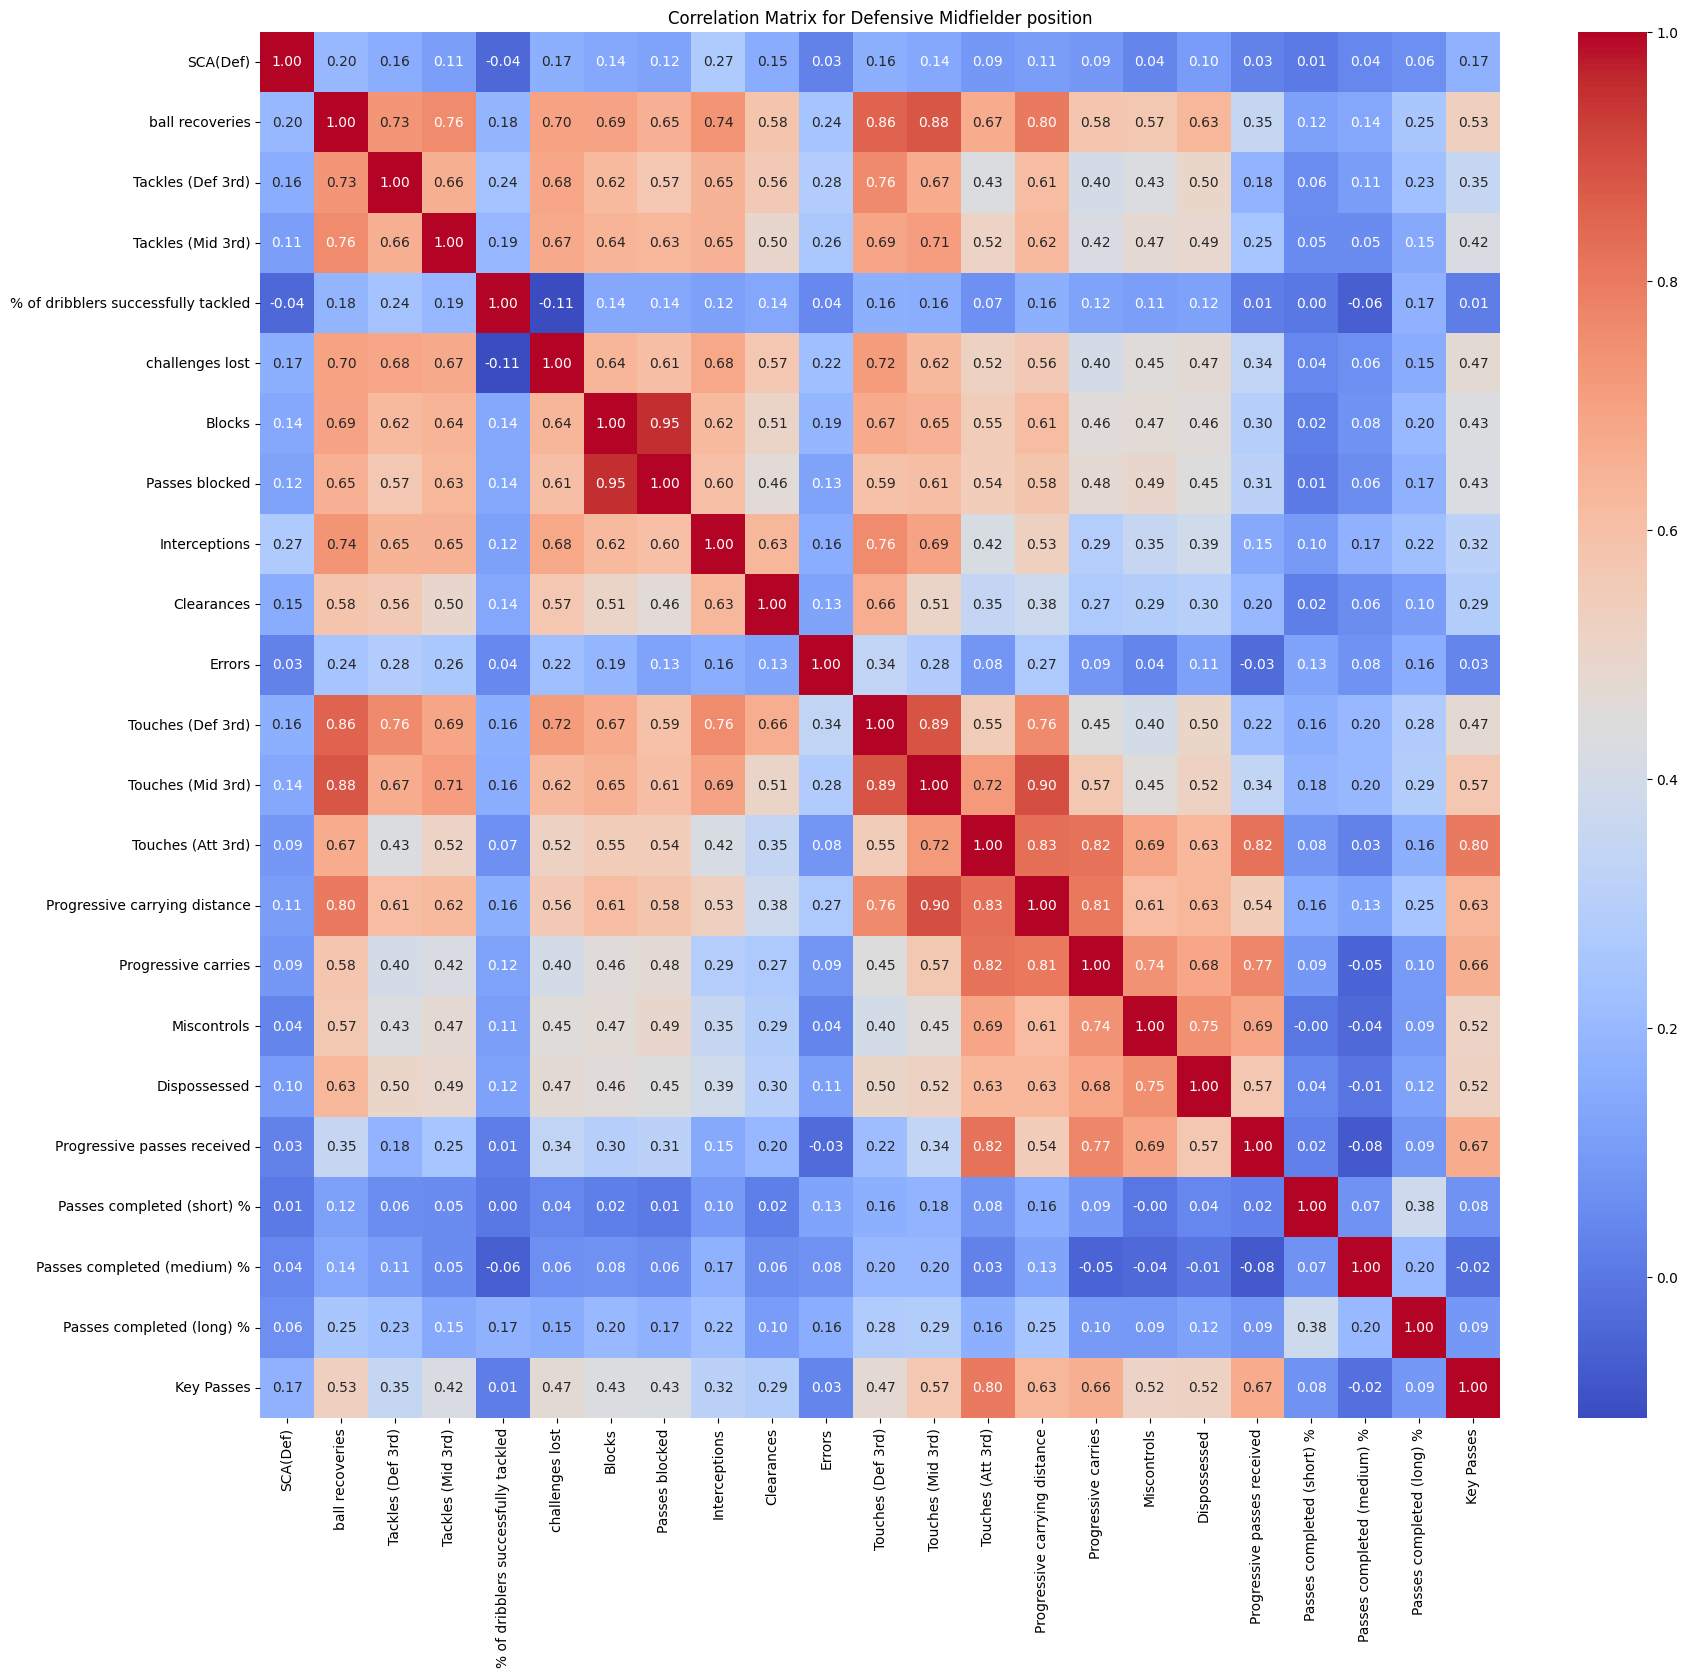

None

In [90]:
#visualization for correlation
def plot_correlation_matrix(data, position_title):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {position_title} position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_dmf, 'Defensive Midfielder'))

<ipython-input-90-df9960a40512>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


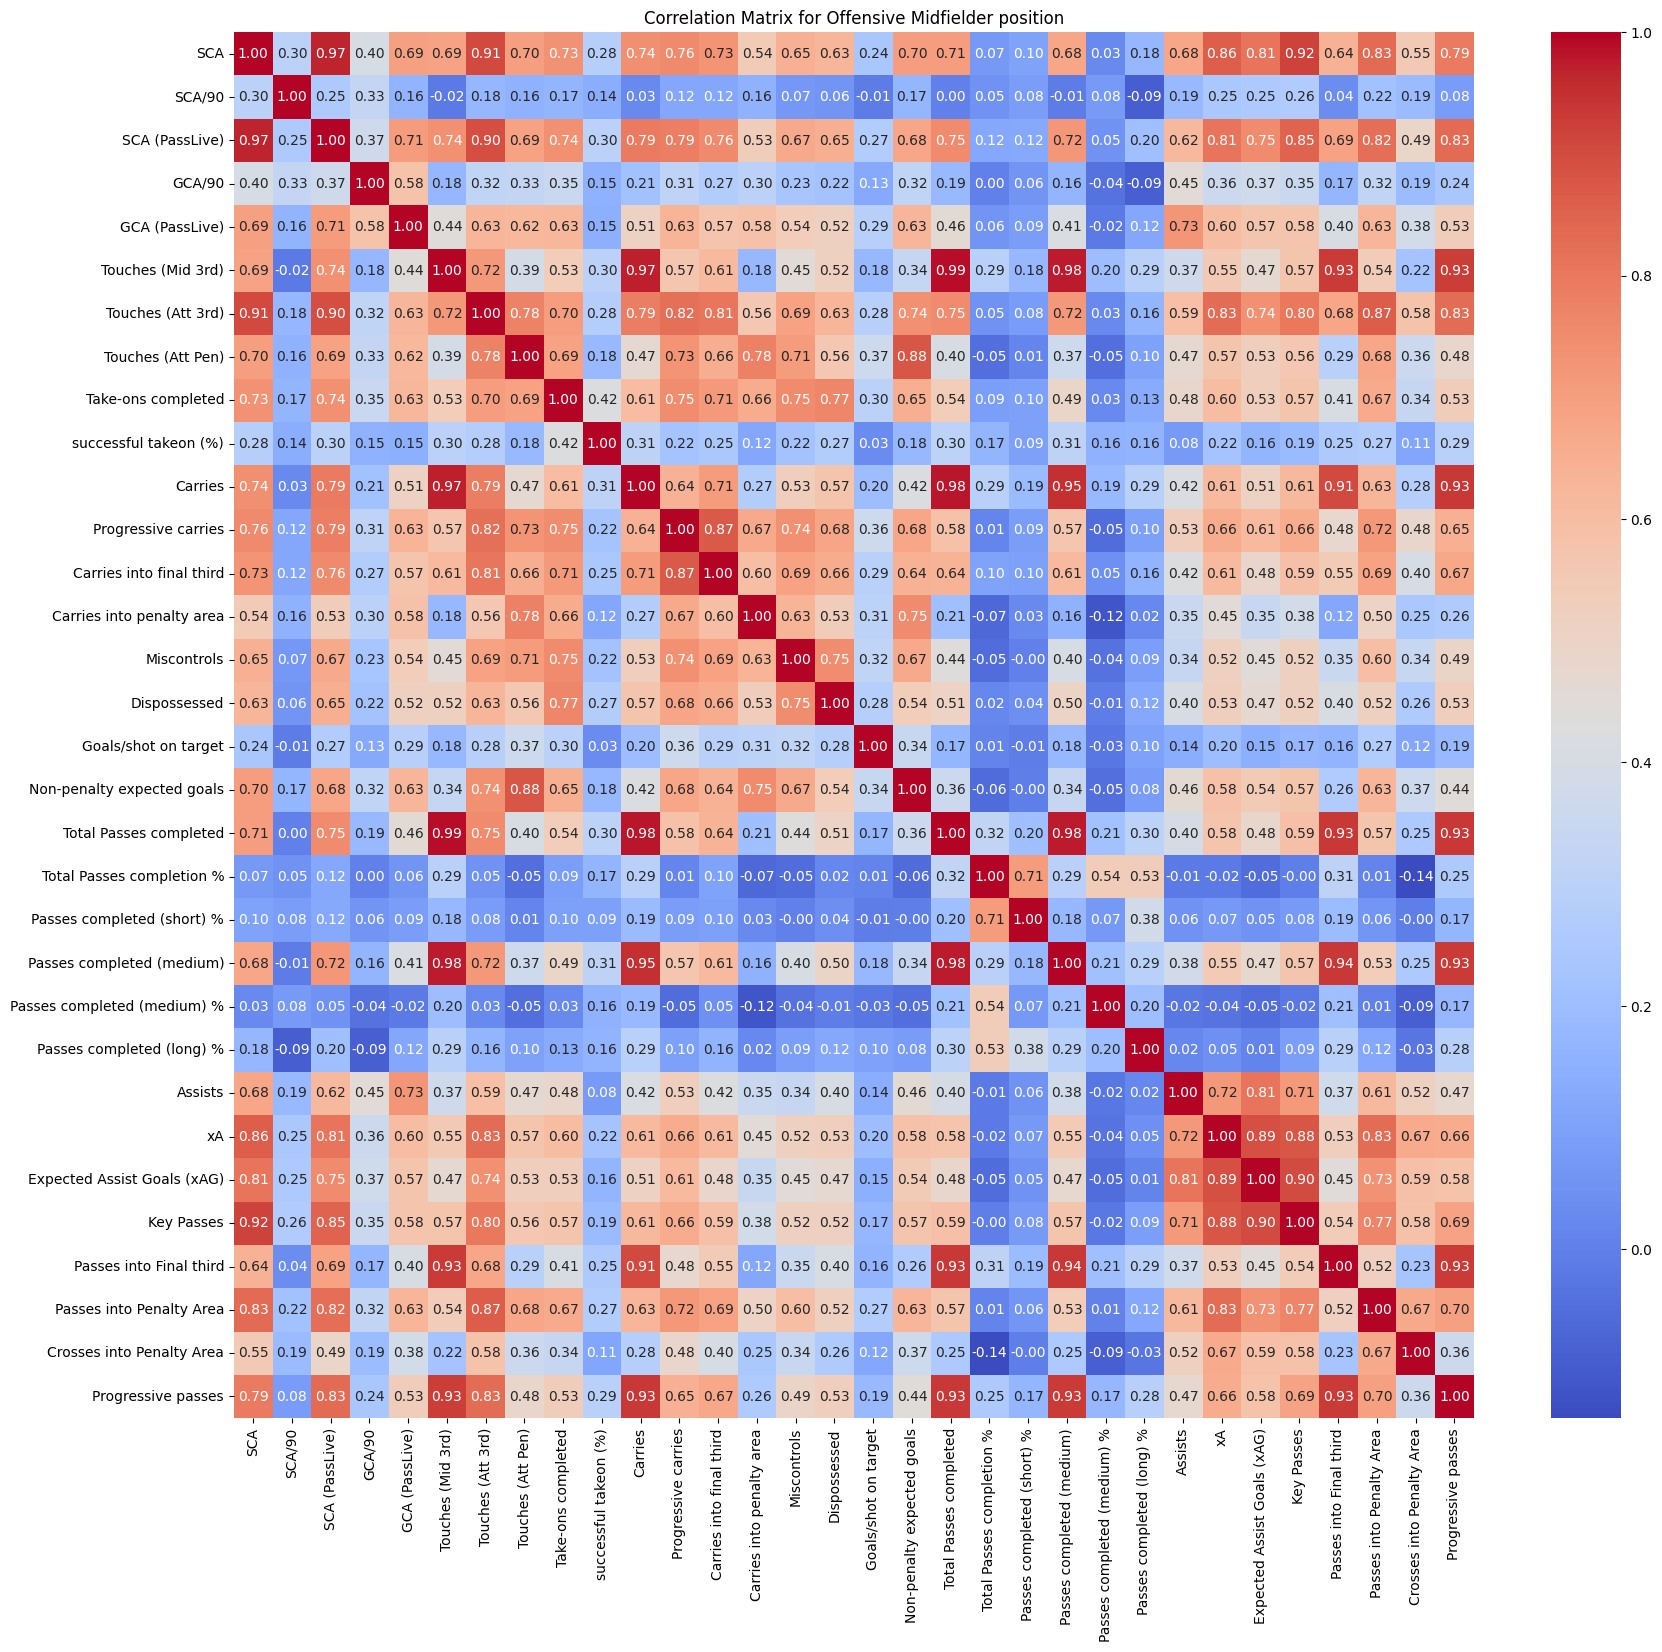

None

In [91]:
# Usage
display(plot_correlation_matrix(df_omf, 'Offensive Midfielder'))

In [92]:
# Define the metrics for analysis
dmf_metrics_for_analysis = df_dmf.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_dmf = df_dmf.reset_index(drop=True)

In [93]:
# Define the metrics for analysis
omf_metrics_for_analysis = df_omf.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_omf = df_omf.reset_index(drop=True)

In [94]:
#Function for Normalizing and Applying Weights
def normalize_and_weight(df, metrics, weights):
    # Normalize metrics
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        df[metric] = (df[metric] - min_val) / (max_val - min_val)

    # Apply weights
    for metric in metrics:
        if metric in weights:
            df[metric] *= weights[metric]

    return df

In [95]:
#Function for Standard Scaling
from sklearn.preprocessing import StandardScaler

def standard_scale(df, metrics):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[metrics])
    scaled_df = pd.DataFrame(scaled_data, columns=metrics)
    scaled_df[['Player', 'Position', 'Club']] = df[['Player', 'Position', 'Club']]
    return scaled_df

In [96]:
# Define weights for each metric for CF position
dmf_metric_weights = {
    'SCA(Def)': 12,
    'ball recoveries': 15,
    'Tackles (Def 3rd)': 15,
    'Tackles (Mid 3rd)': 8,
    '% of dribblers successfully tackled': 12,
    'challenges lost': -8,
    'Passes blocked': 8,
    'Interceptions': 20,
    'Clearances': 10,
    'Errors': -8,
    'Touches (Def 3rd)': 8,
    'Touches (Mid 3rd)': 12,
    'Touches (Att 3rd)': 8,
    'Progressive carrying distance': 10,
    'Progressive carries': 15,
    'Miscontrols': -5,
    'Dispossessed': -8,
    'Progressive passes received': 12,
    'Passes completed (short) %': 10,
    'Passes completed (medium) %': 10,
    'Passes completed (long) %': 10,
}

In [97]:
# Define weights for each metric for WF position
omf_metric_weights = {
    'SCA': 15,
    'SCA/90': 12,
    'SCA (PassLive)': 10,
    'GCA/90': 12,
    'GCA (PassLive)': 10,
    'Touches (Mid 3rd)': 8,
    'Touches (Att 3rd)': 12,
    'Touches (Att Pen)': 10,
    'Take-ons completed': 12,
    'successful takeon (%)': 10,
    'Carries': 8,
    'Progressive carries': 12,
    'Carries into final third': 12,
    'Carries into penalty area': 10,
    'Miscontrols': -5,
    'Dispossessed': -8,
    'Goals/shot on target': 15,
    'Non-penalty expected goals': 12,
    'Total Passes completed': 10,
    'Total Passes completion %': 8,
    'Passes completed (short) %': 10,
    'Passes completed (medium)': 8,
    'Passes completed (medium) %': 8,
    'Passes completed (long) %': 10,
    'Assists': 15,
    'xA': 15,
    'Expected Assist Goals (xAG)': 15,
    'Key Passes': 20,
    'Passes into Final third': 12,
    'Passes into Penalty Area': 12,
    'Crosses into Penalty Area': 8,
    'Progressive passes': 10,
}

In [98]:
#Applying both methods for data processing
# For Defensive Midfielders
df_dmf_normalized_weighted = normalize_and_weight(df_dmf.copy(), dmf_metrics, dmf_metric_weights)
df_dmf_standardized = standard_scale(df_dmf, dmf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_dmf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_dmf_normalized_weighted.head())

Standard Scaler DataFrame:
   SCA(Def)  ball recoveries  Tackles (Def 3rd)  Tackles (Mid 3rd)  \
0 -0.332949        -0.987560          -0.065882          -0.696533   
1 -0.332949         0.624218           0.823519          -0.696533   
2 -0.332949        -0.103682           2.009387           0.714689   
3 -0.332949         0.624218           0.527052           0.714689   
4 -0.332949        -0.987560          -0.955282          -0.696533   

   % of dribblers successfully tackled  challenges lost    Blocks  \
0                             0.242603        -0.440430 -0.853298   
1                            -0.180784         0.270075  0.658763   
2                             0.371313         0.506910  0.154743   
3                             0.432281         0.033240 -0.097267   
4                            -1.450946        -0.914099 -0.601287   

   Passes blocked  Interceptions  Clearances  ...  Miscontrols  Dispossessed  \
0       -0.770044      -0.938059   -0.572247  ...    -0.8

In [99]:
# For Offensive Midfielders
df_omf_normalized_weighted = normalize_and_weight(df_omf.copy(), omf_metrics, omf_metric_weights)
df_omf_standardized = standard_scale(df_omf, omf_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_omf_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_omf_normalized_weighted.head())

Standard Scaler DataFrame:
        SCA    SCA/90  SCA (PassLive)    GCA/90  GCA (PassLive)  \
0 -0.987508 -1.187188       -1.043267 -0.524190       -0.560354   
1  1.184375  0.890222        0.882965  0.097722        0.258625   
2 -0.661726 -0.924049       -0.598752 -0.524190       -0.560354   
3  0.424216  0.567070        0.734793  1.044110        1.077604   
4 -0.878914 -0.845569       -0.895096 -0.524190       -0.560354   

   Touches (Mid 3rd)  Touches (Att 3rd)  Touches (Att Pen)  \
0          -0.885877          -0.923608          -0.784678   
1           0.162490           0.549902           0.277833   
2          -0.276361          -0.245018           0.277833   
3           0.162490           0.356019          -0.481103   
4          -0.820862          -0.865443          -0.784678   

   Take-ons completed  successful takeon (%)  ...        xA  \
0           -0.789751              -1.257231  ... -0.796037   
1            1.238858               0.523812  ...  0.766022   
2       

In [100]:
def calculate_top_players(df, metrics):
    """
    Calculate and return the top n players based on total score.

    :param df: DataFrame containing player data
    :param metrics: list of metric columns to consider for total score
    :param top_n: number of top players to return
    :return: DataFrame with top n players
    """
    # Calculate total score
    df['total_score'] = df[metrics].sum(axis=1)

    # Sort by total score in descending order
    return df.sort_values(by='total_score', ascending=False)

# Calculate top DMFs using Standard Scaler
top_dmf_standardized = calculate_top_players(df_dmf_standardized, dmf_metrics_for_analysis)

# Calculate top DMFs using Weighted Metrics
top_dmf_weighted = calculate_top_players(df_dmf_normalized_weighted, dmf_metrics_for_analysis)

# Display the top 5 Defensive Midfielders for each method
print("Top 5 Defensive Midfielders - StandardScaler Method:")
print(top_dmf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Defensive Midfielders - Weighted Metrics Method:")
print(top_dmf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Defensive Midfielders - StandardScaler Method:
                 Player Position             Club  total_score
134               Rodri       MF  Manchester City    39.770764
13       Nicolò Barella       MF            Inter    38.818845
85       Joshua Kimmich       MF    Bayern Munich    35.721805
163      Marco Verratti       MF        Paris S-G    33.466251
108  Henrikh Mkhitaryan       MF            Inter    31.448391

Top 5 Defensive Midfielders - Weighted Metrics Method:
                 Player Position             Club  total_score
134               Rodri       MF  Manchester City   122.725121
85       Joshua Kimmich       MF    Bayern Munich   101.114849
91           Toni Kroos       MF      Real Madrid    99.521509
100     Florentino Luís       MF          Benfica    98.646519
108  Henrikh Mkhitaryan       MF            Inter    97.216410


In [101]:
# Calculate top OMFs using Standard Scaler
top_omf_standardized = calculate_top_players(df_omf_standardized, omf_metrics_for_analysis)

# Calculate top OMFs using Weighted Metrics
top_omf_weighted = calculate_top_players(df_omf_normalized_weighted, omf_metrics_for_analysis)

# Display the top 5 Offensive Midfielders for each method
print("Top 5 Offensive Midfielders - StandardScaler Method:")
print(top_omf_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Offensive Midfielders - Weighted Metrics Method:")
print(top_omf_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Offensive Midfielders - StandardScaler Method:
              Player Position             Club  total_score
144       Rafa Silva       MF          Benfica    85.784124
38   Kevin De Bruyne       MF  Manchester City    71.338625
68    İlkay Gündoğan       MF  Manchester City    61.869493
134            Rodri       MF  Manchester City    50.467094
13    Nicolò Barella       MF            Inter    49.218527

Top 5 Offensive Midfielders - Weighted Metrics Method:
              Player Position             Club  total_score
38   Kevin De Bruyne       MF  Manchester City   210.257838
144       Rafa Silva       MF          Benfica   206.993697
68    İlkay Gündoğan       MF  Manchester City   180.931091
85    Joshua Kimmich       MF    Bayern Munich   165.147214
170  Piotr Zieliński       MF           Napoli   163.384024


In [102]:
# Linear transformation function
def linear_transform(x, min_x, max_x, new_min, new_max):
    return (x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min

def combine_and_select_top_players(df_standardized, df_weighted, original_df, metrics, top_n=5):
    """
    Combine scores from standardized and weighted data, and select top n players.

    :param df_standardized: DataFrame with standardized scores
    :param df_weighted: DataFrame with weighted scores
    :param original_df: Original DataFrame with player details
    :param metrics: list of metric columns
    :param top_n: number of top players to return
    :return: DataFrame with top n players based on combined score
    """
    # Find the min and max values for linear transformation
    min_standardized = df_standardized['total_score'].min()
    max_standardized = df_standardized['total_score'].max()
    min_weighted = df_weighted['total_score'].min()
    max_weighted = df_weighted['total_score'].max()

    # Apply linear transformation
    df_weighted['total_score_transformed'] = df_weighted['total_score'].apply(
        lambda x: linear_transform(x, min_weighted, max_weighted, min_standardized, max_standardized)
    )

    # Combine scores
    combined_df = original_df.copy()
    combined_df['score'] = (df_standardized['total_score'] + df_weighted['total_score_transformed']) / 2

    # Select and return top players
    return combined_df.sort_values(by='score', ascending=False)

# Use the function for Defensive Midfielders
top_dmf = combine_and_select_top_players(top_dmf_standardized, top_dmf_weighted, df_dmf, dmf_metrics_for_analysis)
print("Top 5 Defensive Midfielders:")
print(top_dmf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Defensive Midfielders:
                 Player             Club Position      score
134               Rodri  Manchester City       MF  39.770764
85       Joshua Kimmich    Bayern Munich       MF  31.328685
13       Nicolò Barella            Inter       MF  30.899493
108  Henrikh Mkhitaryan            Inter       MF  28.034260
100     Florentino Luís          Benfica       MF  27.399602


In [103]:
# Use the function for Offensive Midfielder
top_omf = combine_and_select_top_players(top_omf_standardized, top_omf_weighted, df_omf, omf_metrics_for_analysis)
print("Top 5 Offensive Midfielder:")
print(top_omf[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Offensive Midfielder:
              Player             Club Position      score
144       Rafa Silva          Benfica       MF  84.789937
38   Kevin De Bruyne  Manchester City       MF  78.561375
68    İlkay Gündoğan  Manchester City       MF  64.894516
134            Rodri  Manchester City       MF  53.377201
91        Toni Kroos      Real Madrid       MF  53.068785


In [104]:
def plot_top_players(df, top_n, position_title, x_label='score', y_label='Player'):
    """
    Create a bar plot for the top N players based on their score.

    :param df: DataFrame containing players and their scores.
    :param top_n: Number of top players to display.
    :param position_title: Title of the position (e.g., 'Centre Forwards').
    :param x_label: Label for the x-axis.
    :param y_label: Label for the y-axis.
    """
    top_players = df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")
    plt.title(f'Top {top_n} {position_title} by {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<ipython-input-104-ca94775d0034>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


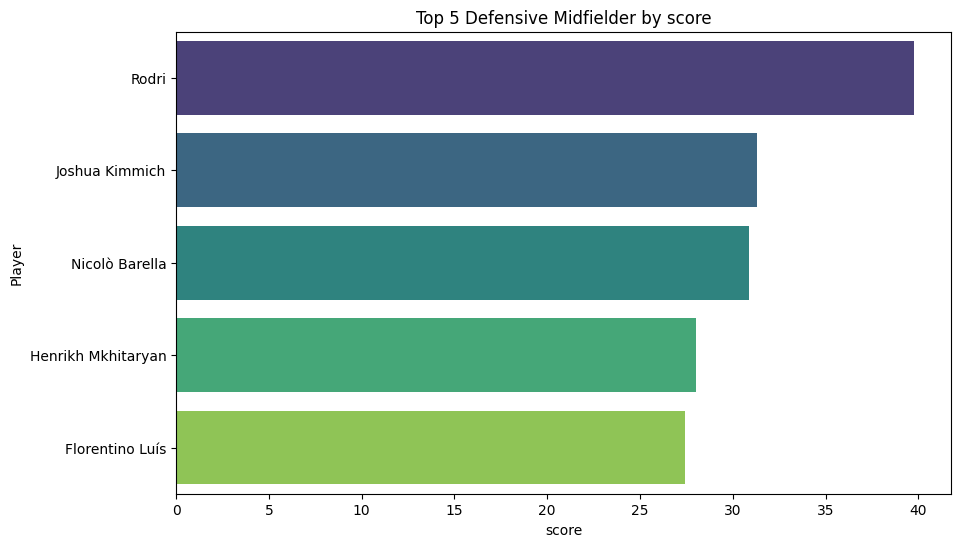

In [105]:
plot_top_players(top_dmf, 5, 'Defensive Midfielder')

<ipython-input-104-ca94775d0034>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


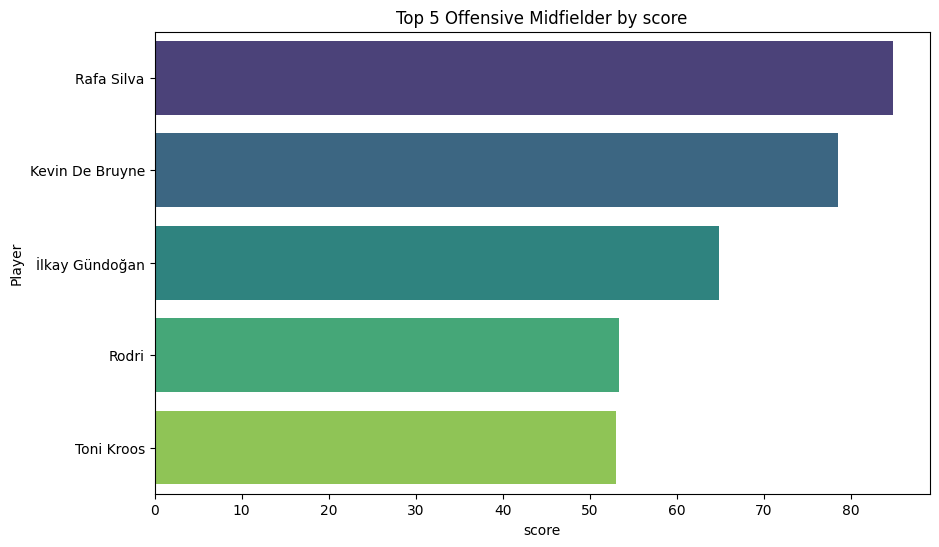

In [106]:
plot_top_players(top_omf, 5, 'Offensive Midfielder')

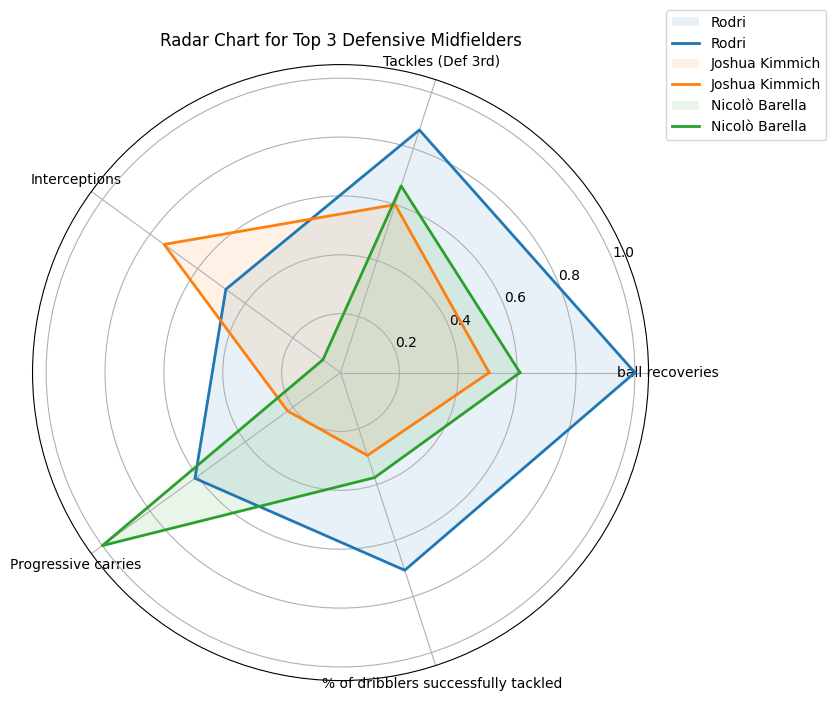

In [107]:
from sklearn.preprocessing import MinMaxScaler

def plot_radar_chart(df, position_title, metrics, top_n=3):
    # Select the top N players
    top_players = df.head(top_n)

    # Extracting the metrics data for scaling
    data_for_scaling = df[metrics]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the data
    scaled_data = scaler.fit_transform(data_for_scaling)

    # Create a DataFrame for the scaled data
    df_scaled = pd.DataFrame(scaled_data, columns=metrics, index=df.index)

    # Now, select the scaled data for the top N players
    top_n_scaled_data = df_scaled.loc[top_players.index]

    # Radar chart setup
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    # Data for radar chart (adding the first metric at the end to close the chart)
    top_n_scaled_data = pd.concat([top_n_scaled_data, top_n_scaled_data.iloc[:, 0]], axis=1)

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(top_players)):
        ax.fill(angles, top_n_scaled_data.iloc[i].values, alpha=0.1, label=top_players.iloc[i]['Player'])
        ax.plot(angles, top_n_scaled_data.iloc[i].values, label=top_players.iloc[i]['Player'], linewidth=2)

    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f'Radar Chart for Top {top_n} {position_title}')

    plt.show()

# Usage for Defensive Midfielders
plot_radar_chart(top_dmf, 'Defensive Midfielders', ['ball recoveries', 'Tackles (Def 3rd)', 'Interceptions', 'Progressive carries', '% of dribblers successfully tackled'], top_n=3)

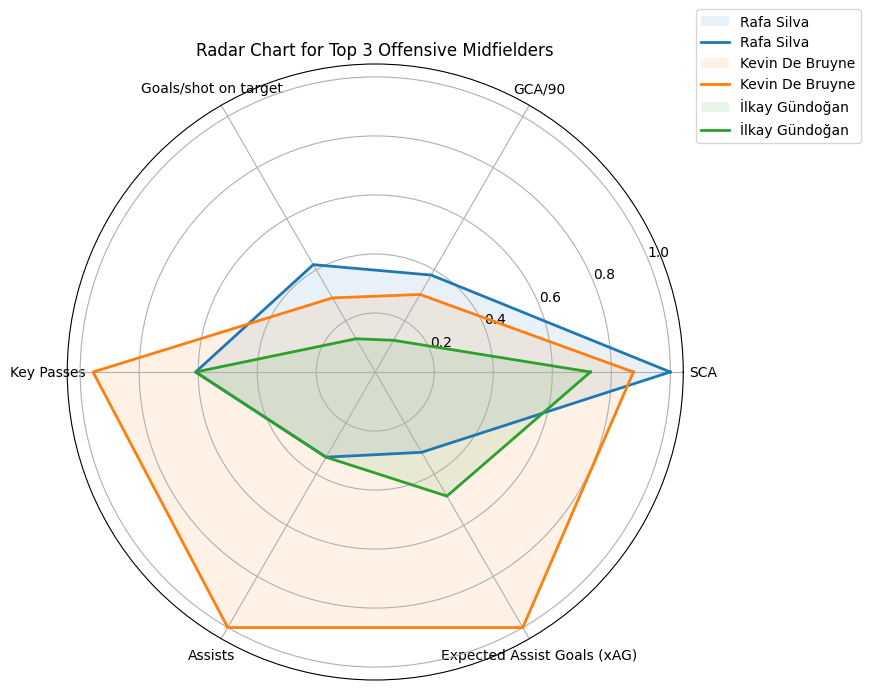

In [108]:
# Plot radar chart usage for Offensive Midfielders
plot_radar_chart(top_omf, 'Offensive Midfielders', ['SCA', 'GCA/90', 'Goals/shot on target', 'Key Passes', 'Assists', 'Expected Assist Goals (xAG)'], top_n=3)

In [109]:
def select_top_n_players(df, position, n):
    # Assuming 'score' is the column representing the performance score
    top_2_players = df[df['Position'] == position].nlargest(n, 'score')
    return top_2_players[['Player', 'Club', 'Position', 'score']]

# Example usage for Defensive Midfielders (DMF)
top_1_dmf = select_top_n_players(top_dmf, 'MF', 1)
print("Top Defensive Midfielders:")
print(top_1_dmf)

# Example usage for Offensive Midfielders (OMF)
top_2_omf = select_top_n_players(top_omf, 'MF', 2)
print("\nTop 2 Offensive Midfielders:")
print(top_2_omf)

Top Defensive Midfielders:
    Player             Club Position      score
134  Rodri  Manchester City       MF  39.770764

Top 2 Offensive Midfielders:
              Player             Club Position      score
144       Rafa Silva          Benfica       MF  84.789937
38   Kevin De Bruyne  Manchester City       MF  78.561375
